# Centiment

## Load dataset

In [1]:
import pandas as %pdb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   13212 non-null  object
 1   sentiment  13212 non-null  object
dtypes: object(2)
memory usage: 206.6+ KB


In [3]:
df.head()

,sentence,sentiment
0,Glencore blames rivals for creating metals glut,negative
1,MTG holding small short pos from 5.72 for swing,negative
2,Operating loss amounted to EUR 0.9 mn in the f...,negative
3,"Operating profits in the half were 0.8 m , do...",negative
4,"With the recent crypto market decline, investo...",negative


## Preprocessing

In [4]:
import nltk
nltk.download(['stopwords', 'punkt'])

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tkthanatorn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/tkthanatorn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
def preprocessing(data):
    # lowercase
    data = [item.lower() for item in data]
    
    # clear punctuation
    table = str.maketrans('', '', punctuation)
    data = [item.translate(table) for item in data]
    data = [re.sub(r'\d+', 'num', item) for item in data]
    
    # clear stopwords
    stopword = set(stopwords.words('english') + ['\x03', '.com', 'cryptograph', 'ambcrypto', 'u.today', 'coingape', 'the dialy hodl'])
    data = [[word for word in item.split() if word not in stopword] for item in data]
    
    # stemming
    stemmer = PorterStemmer()
    data = [' '.join([stemmer.stem(word) for word in item]) for item in data]
    return data

In [6]:
x = df['sentence'].to_numpy()
y = df['sentiment'].to_numpy()
print(f"Shape: {x.shape}, {y.shape}")

x = preprocessing(x)
x = np.array(x, dtype=str)
x[:10]

Shape: (13212,), (13212,)


array(['glencor blame rival creat metal glut',
       'mtg hold small short po num swing',
       'oper loss amount eur num mn first half num compar profit eur num mn first half num',
       'oper profit half num num glisten invest brand manag team',
       'recent crypto market declin investor becom fear market record fear greed index show remain incred frighten time user cryptocurr',
       'decentr financ defi spare recent crypto onslaught crash final put top coin like bitcoin ethereum num alltim high valu also drag defi market',
       'onchain sleuth zachxbt struck thread logan paul alleg litani shadi deal within crypto space thread pseudonym detect reveal possibl scam logan paul allegedli involv base transact record',
       'starbuck share much num sbux httpstcojlgrprrnumk',
       'softwar stop us nsph today num loss trade still hang tight ha',
       'af short ap num put work high stochast crossov'], dtype='<U767')

## Feature Engineering & Cross Validation

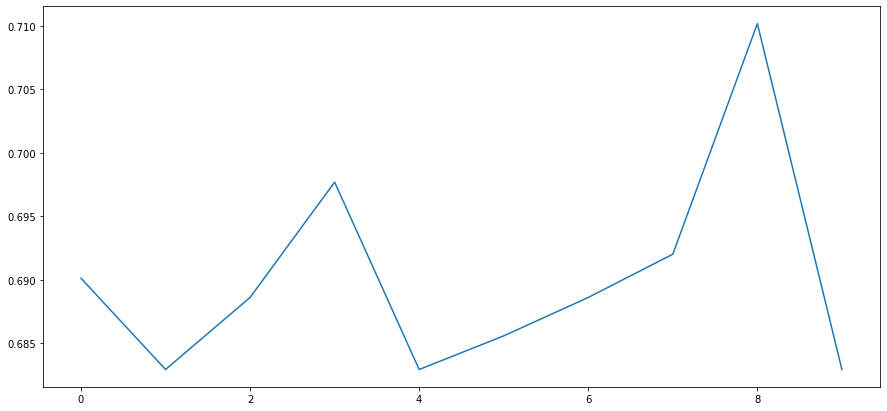

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=2000, solver='liblinear', C=2.154434690031882))
])
cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=42)

scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')

plt.figure(figsize=(15, 7))
plt.plot(range(10), scores)

## Training & Validation

In [8]:
train, test = list(cv.split(x))[8]
x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10569,), (2643,), (10569,), (2643,))

In [9]:
from sklearn.metrics import classification_report
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.72      0.76      0.74       877
     neutral       0.70      0.68      0.69       903
    positive       0.71      0.70      0.70       863

    accuracy                           0.71      2643
   macro avg       0.71      0.71      0.71      2643
weighted avg       0.71      0.71      0.71      2643



In [10]:
import joblib
joblib.dump(model, 'centiment_model.pkl')

['centiment_model.pkl']

In [11]:
clf = joblib.load('./centiment_model.pkl')
# clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.72      0.76      0.74       877
     neutral       0.70      0.68      0.69       903
    positive       0.71      0.70      0.70       863

    accuracy                           0.71      2643
   macro avg       0.71      0.71      0.71      2643
weighted avg       0.71      0.71      0.71      2643

